In [2]:
using Plots , LinearAlgebra

__Sprawozdanie Zadanie 7__

Macierz ma postać :

$$
x_n = -L +nh
$$
$$
A =
\begin{bmatrix}
  \frac{2}{h^2}+4-\frac{6}{cosh(x_1)^2} & \frac{-1}{h^2} & 0 & \cdots & 0 \\
  \frac{-1}{h^2} & \frac{2}{h^2}+4-\frac{6}{cosh(x_2)^2}  & \frac{-1}{h^2} & \cdots & 0 \\
  0 & \frac{-1}{h^2} & \frac{2}{h^2}+4-\frac{6}{cosh(x_3)^2} & \ddots & \vdots \\
  \vdots & \vdots & \ddots & \ddots & \frac{-1}{h^2} \\
  0 & \cdots & \cdots & \frac{-1}{h^2} & \frac{2}{h^2}+4-\frac{6}{cosh(x_n)^2}
\end{bmatrix}
$$
Do poszukiwania wartości oraz wektorów własnych dobrą metodą jest metoda $QR$ Za pomocą tej metody wyznaczyć możemy wszystkie wartości własne oraz odpowiadające im wektory a następnie wybrać 4 najmniejsze. Jednak dla dużych macierzy N = 100...1000 obliczenia mogą trwać dosyć sporo. 

In [21]:
N =100
L = 10
h = 2*L/N-1

upper = [(-1/h*h) for _ in 1:N-1]
diagonal = [((2/h*h)+4+(-6/cosh(-L + i* h)^2)) for i in 1:N]
lower = [(-1/h*h) for _ in 1:N-1]

max_i=10000
epsilon = 1e-8

matrix = Tridiagonal(lower,diagonal,upper)


100×100 Tridiagonal{Float64, Vector{Float64}}:
  6.0  -1.0    ⋅     ⋅     ⋅     ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
 -1.0   6.0  -1.0    ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅   -1.0   6.0  -1.0    ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅   -1.0   6.0  -1.0    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅   -1.0   6.0  -1.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅   -1.0   6.0  …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅   -1.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
  ⋮                             ⋮    ⋱         ⋮                      
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅  

Liczba iteracji po których osiągnięto dokładność 388
  0.092108 seconds (22.34 k allocations: 4.614 MiB, 28.89% gc time, 58.40% compilation time)
4 najmniejsze wartości własne

n = 10
Wartość własna: -0.27905933008737516
Dla wektora y = [1.4517403433918894e-7, 9.115563217399679e-7, 5.578539730611245e-6, 3.4116314293018914e-5, 0.00020863479107186933, 0.0012756866096909315, 0.007791213320791959, 0.047184593683808014, 0.26848186710116984, 0.9620960066703615]
x_n =0.0
y_n=0.9620960066703615

n = 9
Wartość własna: 3.254732701533469
Dla wektora y = [0.0010485422159659634, 0.002878528273290373, 0.006853779545954814, 0.015936791806596965, 0.03689462381524922, 0.08530861577265036, 0.19661396146332394, 0.4428104591483234, 0.8313095663008909, -0.25541561858803913]
x_n =-1.0
y_n=0.8313095663008909

n = 8
Wartość własna: 4.135537436723872
Dla wektora y = [0.17397938862972617, 0.3243779932889368, 0.43081036011390844, 0.47884319748077264, 0.46190424539317687, 0.381856731481526, 0.24698102871972377, 0

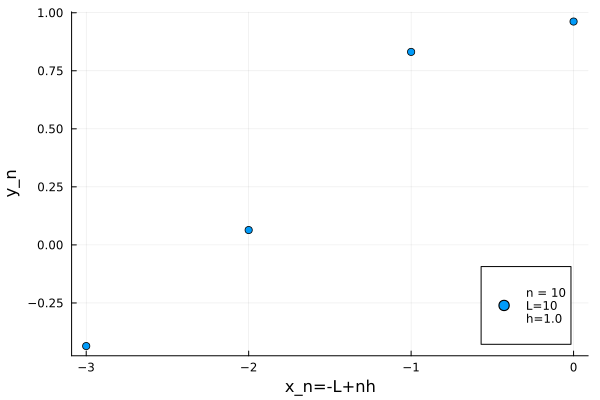

In [8]:
matrix_c = copy(matrix)
function qr_method(matrix_c, max_i, epsilon)
    n = size(matrix_c, 1)
    V = I(n) 
    for i in 1:max_i
        Q, R = qr(matrix_c)
        matrix_c = R * Q
        V *= Q
        if norm(matrix_c - diagm(diag(matrix_c))) < epsilon
            println("Liczba iteracji po których osiągnięto dokładność ",i)
            break
        end
    end
    eigenvalues = diag(matrix_c)
    eigenvectors = V
    return eigenvalues, eigenvectors
end
@time eigenvalues, eigenvectors = qr_method(matrix_c,max_i,epsilon)

smallestindexes = sortperm(abs.(eigenvalues))[1:4]

println("4 najmniejsze wartości własne")
x_values =[]
y_values =[]
for i in 1:4
    n = smallestindexes[i]
    x_n = -L + n*h
    y_n = eigenvectors[:,n][n]
    println("\nn = ",n,"\nWartość własna: ",eigenvalues[n],"\nDla wektora y = ",eigenvectors[:,n])
    println("x_n =",x_n,"\ny_n=",y_n)
    push!(x_values,x_n)
    push!(y_values,y_n)

end
labelString = "n = " * string(N) * "\nL=" * string(L) * "\nh=" * string(h)
scatter(x_values, y_values, xlabel="x_n=-L+nh",ylabel="y_n",legend=:bottomright, label=labelString)

  0.067357 seconds (17.70 k allocations: 1.807 MiB, 98.26% compilation time)
Any[7.8688940095227515, 7.504398381975454, 6.96909497730576, 6.332703031493094, 5.665029266160726, 5.033677486837047, 4.50273913095202, 4.135537436723869, 3.254732701533466, -0.2790593300873752]
4 najmniejsze wartości własne

n = 10
Wartość własna: -0.2790593300873752
Dla wektora y = [1.4515711326850383e-7, 9.11509868495902e-7, 5.578429125797539e-6, 3.411605710856582e-5, 0.00020863419567481405, 0.0012756852329996423, 0.007791210147880628, 0.04718458653783311, 0.2684818536856854, 0.9620960107922004]
x_n =0.0
y_n=0.9620960107922004

n = 9
Wartość własna: 3.254732701533466
Dla wektora y = [-0.0010485442889154116, -0.0028785321382255574, -0.0068537846790161705, -0.015936797511926122, -0.0368946293185108, -0.08530862032067595, -0.1966139643953016, -0.44281045984570677, -0.8313095640853212, 0.255415619473327]
x_n =-1.0
y_n=-0.8313095640853212

n = 8
Wartość własna: 4.135537436723869
Dla wektora y = [0.17397937972200

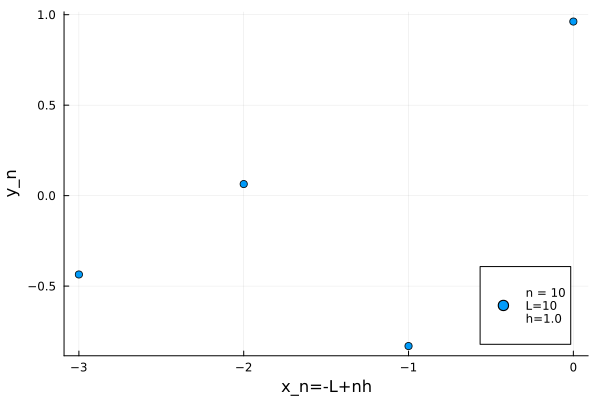

In [18]:
matrix_c = copy(matrix)
function power(matrix_c,max_i, epsilon)
    eigenvalues =[]
    eigenvectors=[]
    n = size(matrix_c, 1)
    for _ in 1:n
        v = randn(n)
        v /= norm(v, 2)
        eigen = 0.0
        for i in 1:max_i
            v_new = matrix_c * v
            eigen = dot(v, v_new)
            v = v_new / norm(v_new, 2)
            if norm(matrix_c * v - eigen * v, 2) < epsilon
                break
            end
        end
        matrix_c -= eigen * (v * v')
        push!(eigenvectors,v)
        push!(eigenvalues,eigen)
    end
    return eigenvalues, eigenvectors
end

@time eigenvalues, eigenvectors = power(matrix_c,max_i,epsilon)

smallestindexes = sortperm(abs.(eigenvalues))[1:4]


println(eigenvalues)
println("4 najmniejsze wartości własne")
x_values =[]
y_values =[]
for i in 1:4
    n = smallestindexes[i]
    x_n = -L + n*h
    y_n = eigenvectors[n][n]
    println("\nn = ",n,"\nWartość własna: ",eigenvalues[n],"\nDla wektora y = ",eigenvectors[n])
    println("x_n =",x_n,"\ny_n=",y_n)
    push!(x_values,x_n)
    push!(y_values,y_n)

end
labelString = "n = " * string(N) * "\nL=" * string(L) * "\nh=" * string(h)
scatter(x_values, y_values, xlabel="x_n=-L+nh",ylabel="y_n",legend=:bottomright, label=labelString)
